In [4]:
#CIFAR
import torch
import torch.nn as nn
import torch.nn.functional as f
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
import sys
import numpy as np
import torch.nn as nn
%matplotlib inline

In [2]:
print(sys.version)
print(torch.cuda.get_device_name(0))

3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
GeForce GTX 1660


In [3]:
def data_loader(batch_size):
    transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])  # Normalize(平均, 偏差)

    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size,
                                              shuffle=True, num_workers=2)

    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size,
                                             shuffle=False, num_workers=2)


    return trainloader, testloader

In [36]:
class AlexNet(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

In [90]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [91]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = AlexNet().to(device)

In [92]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)

In [93]:
batch_size = 64
train_loader, test_loader = data_loader(batch_size)

Files already downloaded and verified
Files already downloaded and verified


In [94]:
num_epochs = 20

train_loss_list = []
train_acc_list = []
val_loss_list = []
val_acc_list = []

for epoch in range(num_epochs):
    train_loss = 0
    train_acc = 0
    val_loss = 0
    val_acc = 0
    
    net.train()
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = net(images)
        loss = criterion(outputs, labels)
        train_loss += loss.item()
        train_acc += (outputs.max(1)[1] == labels).sum().item()
        loss.backward()
        optimizer.step()
        
        if i % 10 == 0:
                print('Training log: {} epoch ({} / 60000 train. data). Loss: {}'.format(epoch+1, (i+1)*batch_size, loss.item()))
    
    avg_train_loss = train_loss / len(train_loader)
    avg_train_acc = train_acc / len(train_loader.dataset)
    
    net.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            val_acc += (outputs.max(1)[1] == labels).sum().item()
            
    avg_val_loss = val_loss / len(test_loader)
    avg_val_acc = val_acc / len(test_loader.dataset)
    
    print('Test loss (avg): {}, Accuracy: {}'.format(avg_val_loss, avg_val_acc))
    
    train_loss_list.append(avg_train_loss)
    train_acc_list.append(avg_train_acc)
    val_loss_list.append(avg_val_loss)
    val_acc_list.append(avg_val_acc)
    
            

Training log: 1 epoch (64 / 60000 train. data). Loss: 2.301616907119751
Training log: 1 epoch (704 / 60000 train. data). Loss: 2.3027710914611816
Training log: 1 epoch (1344 / 60000 train. data). Loss: 2.3029160499572754
Training log: 1 epoch (1984 / 60000 train. data). Loss: 2.2984402179718018
Training log: 1 epoch (2624 / 60000 train. data). Loss: 2.303968906402588
Training log: 1 epoch (3264 / 60000 train. data). Loss: 2.2983903884887695
Training log: 1 epoch (3904 / 60000 train. data). Loss: 2.300436496734619
Training log: 1 epoch (4544 / 60000 train. data). Loss: 2.2977752685546875
Training log: 1 epoch (5184 / 60000 train. data). Loss: 2.30855131149292
Training log: 1 epoch (5824 / 60000 train. data). Loss: 2.293935537338257
Training log: 1 epoch (6464 / 60000 train. data). Loss: 2.303837537765503
Training log: 1 epoch (7104 / 60000 train. data). Loss: 2.303439140319824
Training log: 1 epoch (7744 / 60000 train. data). Loss: 2.300152063369751
Training log: 1 epoch (8384 / 60000 t

Training log: 2 epoch (19904 / 60000 train. data). Loss: 1.690809965133667
Training log: 2 epoch (20544 / 60000 train. data). Loss: 1.4287787675857544
Training log: 2 epoch (21184 / 60000 train. data). Loss: 1.483710527420044
Training log: 2 epoch (21824 / 60000 train. data). Loss: 1.6092280149459839
Training log: 2 epoch (22464 / 60000 train. data). Loss: 1.4314743280410767
Training log: 2 epoch (23104 / 60000 train. data). Loss: 1.3194504976272583
Training log: 2 epoch (23744 / 60000 train. data). Loss: 1.621449589729309
Training log: 2 epoch (24384 / 60000 train. data). Loss: 1.5161455869674683
Training log: 2 epoch (25024 / 60000 train. data). Loss: 1.3301689624786377
Training log: 2 epoch (25664 / 60000 train. data). Loss: 1.506870985031128
Training log: 2 epoch (26304 / 60000 train. data). Loss: 1.5759800672531128
Training log: 2 epoch (26944 / 60000 train. data). Loss: 1.2535994052886963
Training log: 2 epoch (27584 / 60000 train. data). Loss: 1.215035319328308
Training log: 2 e

Training log: 3 epoch (39744 / 60000 train. data). Loss: 1.1524596214294434
Training log: 3 epoch (40384 / 60000 train. data). Loss: 1.14663565158844
Training log: 3 epoch (41024 / 60000 train. data). Loss: 1.0796411037445068
Training log: 3 epoch (41664 / 60000 train. data). Loss: 1.0990619659423828
Training log: 3 epoch (42304 / 60000 train. data). Loss: 1.3222118616104126
Training log: 3 epoch (42944 / 60000 train. data). Loss: 1.1468504667282104
Training log: 3 epoch (43584 / 60000 train. data). Loss: 1.471786379814148
Training log: 3 epoch (44224 / 60000 train. data). Loss: 1.121242880821228
Training log: 3 epoch (44864 / 60000 train. data). Loss: 1.3417978286743164
Training log: 3 epoch (45504 / 60000 train. data). Loss: 1.202244758605957
Training log: 3 epoch (46144 / 60000 train. data). Loss: 1.1652023792266846
Training log: 3 epoch (46784 / 60000 train. data). Loss: 1.2825056314468384
Training log: 3 epoch (47424 / 60000 train. data). Loss: 1.5329159498214722
Training log: 3 e

Training log: 5 epoch (9024 / 60000 train. data). Loss: 0.8874474167823792
Training log: 5 epoch (9664 / 60000 train. data). Loss: 0.904802680015564
Training log: 5 epoch (10304 / 60000 train. data). Loss: 0.9342049360275269
Training log: 5 epoch (10944 / 60000 train. data). Loss: 0.8559538722038269
Training log: 5 epoch (11584 / 60000 train. data). Loss: 0.9798632264137268
Training log: 5 epoch (12224 / 60000 train. data). Loss: 0.8905999064445496
Training log: 5 epoch (12864 / 60000 train. data). Loss: 1.1020320653915405
Training log: 5 epoch (13504 / 60000 train. data). Loss: 0.9158905744552612
Training log: 5 epoch (14144 / 60000 train. data). Loss: 1.0813461542129517
Training log: 5 epoch (14784 / 60000 train. data). Loss: 0.870697557926178
Training log: 5 epoch (15424 / 60000 train. data). Loss: 1.0660706758499146
Training log: 5 epoch (16064 / 60000 train. data). Loss: 1.0241073369979858
Training log: 5 epoch (16704 / 60000 train. data). Loss: 1.0266802310943604
Training log: 5 

Training log: 6 epoch (27584 / 60000 train. data). Loss: 1.129307746887207
Training log: 6 epoch (28224 / 60000 train. data). Loss: 0.7847161889076233
Training log: 6 epoch (28864 / 60000 train. data). Loss: 0.8359952569007874
Training log: 6 epoch (29504 / 60000 train. data). Loss: 0.9320109486579895
Training log: 6 epoch (30144 / 60000 train. data). Loss: 0.7617002725601196
Training log: 6 epoch (30784 / 60000 train. data). Loss: 0.7991049289703369
Training log: 6 epoch (31424 / 60000 train. data). Loss: 0.8861198425292969
Training log: 6 epoch (32064 / 60000 train. data). Loss: 0.819220781326294
Training log: 6 epoch (32704 / 60000 train. data). Loss: 0.8102908730506897
Training log: 6 epoch (33344 / 60000 train. data). Loss: 0.9011285901069641
Training log: 6 epoch (33984 / 60000 train. data). Loss: 0.7077845931053162
Training log: 6 epoch (34624 / 60000 train. data). Loss: 1.159480094909668
Training log: 6 epoch (35264 / 60000 train. data). Loss: 1.1631065607070923
Training log: 6

Training log: 7 epoch (47424 / 60000 train. data). Loss: 0.7082303166389465
Training log: 7 epoch (48064 / 60000 train. data). Loss: 0.9418148398399353
Training log: 7 epoch (48704 / 60000 train. data). Loss: 0.7592458128929138
Training log: 7 epoch (49344 / 60000 train. data). Loss: 0.5706667900085449
Training log: 7 epoch (49984 / 60000 train. data). Loss: 0.748213529586792
Test loss (avg): 1.0301315495922307, Accuracy: 0.6539
Training log: 8 epoch (64 / 60000 train. data). Loss: 0.5270743370056152
Training log: 8 epoch (704 / 60000 train. data). Loss: 0.735977053642273
Training log: 8 epoch (1344 / 60000 train. data). Loss: 0.602800190448761
Training log: 8 epoch (1984 / 60000 train. data). Loss: 0.7975266575813293
Training log: 8 epoch (2624 / 60000 train. data). Loss: 0.5768478512763977
Training log: 8 epoch (3264 / 60000 train. data). Loss: 0.6393113136291504
Training log: 8 epoch (3904 / 60000 train. data). Loss: 0.5611863732337952
Training log: 8 epoch (4544 / 60000 train. data

Training log: 9 epoch (15424 / 60000 train. data). Loss: 0.5069215297698975
Training log: 9 epoch (16064 / 60000 train. data). Loss: 0.5700684189796448
Training log: 9 epoch (16704 / 60000 train. data). Loss: 0.728138267993927
Training log: 9 epoch (17344 / 60000 train. data). Loss: 0.657983124256134
Training log: 9 epoch (17984 / 60000 train. data). Loss: 0.5441047549247742
Training log: 9 epoch (18624 / 60000 train. data). Loss: 0.7069587707519531
Training log: 9 epoch (19264 / 60000 train. data). Loss: 0.7540833950042725
Training log: 9 epoch (19904 / 60000 train. data). Loss: 0.6463432312011719
Training log: 9 epoch (20544 / 60000 train. data). Loss: 0.572359561920166
Training log: 9 epoch (21184 / 60000 train. data). Loss: 0.5922667980194092
Training log: 9 epoch (21824 / 60000 train. data). Loss: 0.41873618960380554
Training log: 9 epoch (22464 / 60000 train. data). Loss: 0.46680235862731934
Training log: 9 epoch (23104 / 60000 train. data). Loss: 0.6410530209541321
Training log:

Training log: 10 epoch (33344 / 60000 train. data). Loss: 0.5298827290534973
Training log: 10 epoch (33984 / 60000 train. data). Loss: 0.4946088194847107
Training log: 10 epoch (34624 / 60000 train. data). Loss: 0.5703274011611938
Training log: 10 epoch (35264 / 60000 train. data). Loss: 0.43887609243392944
Training log: 10 epoch (35904 / 60000 train. data). Loss: 0.4479857087135315
Training log: 10 epoch (36544 / 60000 train. data). Loss: 0.5956152081489563
Training log: 10 epoch (37184 / 60000 train. data). Loss: 0.4419703185558319
Training log: 10 epoch (37824 / 60000 train. data). Loss: 0.44472959637641907
Training log: 10 epoch (38464 / 60000 train. data). Loss: 0.7892881631851196
Training log: 10 epoch (39104 / 60000 train. data). Loss: 0.30617186427116394
Training log: 10 epoch (39744 / 60000 train. data). Loss: 0.5984641313552856
Training log: 10 epoch (40384 / 60000 train. data). Loss: 0.5611686706542969
Training log: 10 epoch (41024 / 60000 train. data). Loss: 0.5266132354736

Test loss (avg): 1.1757096131895757, Accuracy: 0.6507
Training log: 12 epoch (64 / 60000 train. data). Loss: 0.3202570974826813
Training log: 12 epoch (704 / 60000 train. data). Loss: 0.6249687671661377
Training log: 12 epoch (1344 / 60000 train. data). Loss: 0.38567572832107544
Training log: 12 epoch (1984 / 60000 train. data). Loss: 0.3359237313270569
Training log: 12 epoch (2624 / 60000 train. data). Loss: 0.3284139037132263
Training log: 12 epoch (3264 / 60000 train. data). Loss: 0.5204482078552246
Training log: 12 epoch (3904 / 60000 train. data). Loss: 0.3785219192504883
Training log: 12 epoch (4544 / 60000 train. data). Loss: 0.2855224013328552
Training log: 12 epoch (5184 / 60000 train. data). Loss: 0.2119428515434265
Training log: 12 epoch (5824 / 60000 train. data). Loss: 0.27212679386138916
Training log: 12 epoch (6464 / 60000 train. data). Loss: 0.44116145372390747
Training log: 12 epoch (7104 / 60000 train. data). Loss: 0.26010558009147644
Training log: 12 epoch (7744 / 60

Training log: 13 epoch (16704 / 60000 train. data). Loss: 0.43841469287872314
Training log: 13 epoch (17344 / 60000 train. data). Loss: 0.30684804916381836
Training log: 13 epoch (17984 / 60000 train. data). Loss: 0.3588405251502991
Training log: 13 epoch (18624 / 60000 train. data). Loss: 0.32212013006210327
Training log: 13 epoch (19264 / 60000 train. data). Loss: 0.30237966775894165
Training log: 13 epoch (19904 / 60000 train. data). Loss: 0.3116000294685364
Training log: 13 epoch (20544 / 60000 train. data). Loss: 0.23405204713344574
Training log: 13 epoch (21184 / 60000 train. data). Loss: 0.44797205924987793
Training log: 13 epoch (21824 / 60000 train. data). Loss: 0.3531419038772583
Training log: 13 epoch (22464 / 60000 train. data). Loss: 0.3158494830131531
Training log: 13 epoch (23104 / 60000 train. data). Loss: 0.27298620343208313
Training log: 13 epoch (23744 / 60000 train. data). Loss: 0.4471573829650879
Training log: 13 epoch (24384 / 60000 train. data). Loss: 0.606140553

Training log: 14 epoch (35264 / 60000 train. data). Loss: 0.24309813976287842
Training log: 14 epoch (35904 / 60000 train. data). Loss: 0.39266982674598694
Training log: 14 epoch (36544 / 60000 train. data). Loss: 0.4224433898925781
Training log: 14 epoch (37184 / 60000 train. data). Loss: 0.33785173296928406
Training log: 14 epoch (37824 / 60000 train. data). Loss: 0.5189777612686157
Training log: 14 epoch (38464 / 60000 train. data). Loss: 0.32830610871315
Training log: 14 epoch (39104 / 60000 train. data). Loss: 0.24069884419441223
Training log: 14 epoch (39744 / 60000 train. data). Loss: 0.3091832101345062
Training log: 14 epoch (40384 / 60000 train. data). Loss: 0.33738842606544495
Training log: 14 epoch (41024 / 60000 train. data). Loss: 0.31203457713127136
Training log: 14 epoch (41664 / 60000 train. data). Loss: 0.5276457667350769
Training log: 14 epoch (42304 / 60000 train. data). Loss: 0.280600368976593
Training log: 14 epoch (42944 / 60000 train. data). Loss: 0.3918246328830

Training log: 16 epoch (1344 / 60000 train. data). Loss: 0.2506556212902069
Training log: 16 epoch (1984 / 60000 train. data). Loss: 0.30142998695373535
Training log: 16 epoch (2624 / 60000 train. data). Loss: 0.2180357277393341
Training log: 16 epoch (3264 / 60000 train. data). Loss: 0.3232074975967407
Training log: 16 epoch (3904 / 60000 train. data). Loss: 0.1938140094280243
Training log: 16 epoch (4544 / 60000 train. data). Loss: 0.22688162326812744
Training log: 16 epoch (5184 / 60000 train. data). Loss: 0.07299897074699402
Training log: 16 epoch (5824 / 60000 train. data). Loss: 0.08549608290195465
Training log: 16 epoch (6464 / 60000 train. data). Loss: 0.14171136915683746
Training log: 16 epoch (7104 / 60000 train. data). Loss: 0.0912608951330185
Training log: 16 epoch (7744 / 60000 train. data). Loss: 0.11737748235464096
Training log: 16 epoch (8384 / 60000 train. data). Loss: 0.14363132417201996
Training log: 16 epoch (9024 / 60000 train. data). Loss: 0.13061076402664185
Trai

Training log: 17 epoch (19264 / 60000 train. data). Loss: 0.23877312242984772
Training log: 17 epoch (19904 / 60000 train. data). Loss: 0.1045893058180809
Training log: 17 epoch (20544 / 60000 train. data). Loss: 0.14008627831935883
Training log: 17 epoch (21184 / 60000 train. data). Loss: 0.2069380283355713
Training log: 17 epoch (21824 / 60000 train. data). Loss: 0.09239030629396439
Training log: 17 epoch (22464 / 60000 train. data). Loss: 0.37835919857025146
Training log: 17 epoch (23104 / 60000 train. data). Loss: 0.33313798904418945
Training log: 17 epoch (23744 / 60000 train. data). Loss: 0.19401049613952637
Training log: 17 epoch (24384 / 60000 train. data). Loss: 0.5338621139526367
Training log: 17 epoch (25024 / 60000 train. data). Loss: 0.2331051528453827
Training log: 17 epoch (25664 / 60000 train. data). Loss: 0.2364254891872406
Training log: 17 epoch (26304 / 60000 train. data). Loss: 0.28638797998428345
Training log: 17 epoch (26944 / 60000 train. data). Loss: 0.217951416

Training log: 18 epoch (37824 / 60000 train. data). Loss: 0.3318111300468445
Training log: 18 epoch (38464 / 60000 train. data). Loss: 0.21462003886699677
Training log: 18 epoch (39104 / 60000 train. data). Loss: 0.15943782031536102
Training log: 18 epoch (39744 / 60000 train. data). Loss: 0.3626052439212799
Training log: 18 epoch (40384 / 60000 train. data). Loss: 0.15841487050056458
Training log: 18 epoch (41024 / 60000 train. data). Loss: 0.16110986471176147
Training log: 18 epoch (41664 / 60000 train. data). Loss: 0.1517091989517212
Training log: 18 epoch (42304 / 60000 train. data). Loss: 0.29516109824180603
Training log: 18 epoch (42944 / 60000 train. data). Loss: 0.2312433421611786
Training log: 18 epoch (43584 / 60000 train. data). Loss: 0.33077579736709595
Training log: 18 epoch (44224 / 60000 train. data). Loss: 0.1484343558549881
Training log: 18 epoch (44864 / 60000 train. data). Loss: 0.09100057184696198
Training log: 18 epoch (45504 / 60000 train. data). Loss: 0.125630974

Training log: 20 epoch (5184 / 60000 train. data). Loss: 0.10677073895931244
Training log: 20 epoch (5824 / 60000 train. data). Loss: 0.05505160242319107
Training log: 20 epoch (6464 / 60000 train. data). Loss: 0.1491697132587433
Training log: 20 epoch (7104 / 60000 train. data). Loss: 0.07277152687311172
Training log: 20 epoch (7744 / 60000 train. data). Loss: 0.12982776761054993
Training log: 20 epoch (8384 / 60000 train. data). Loss: 0.0867377370595932
Training log: 20 epoch (9024 / 60000 train. data). Loss: 0.05883704870939255
Training log: 20 epoch (9664 / 60000 train. data). Loss: 0.1069176122546196
Training log: 20 epoch (10304 / 60000 train. data). Loss: 0.11169836670160294
Training log: 20 epoch (10944 / 60000 train. data). Loss: 0.22232306003570557
Training log: 20 epoch (11584 / 60000 train. data). Loss: 0.12738290429115295
Training log: 20 epoch (12224 / 60000 train. data). Loss: 0.11961692571640015
Training log: 20 epoch (12864 / 60000 train. data). Loss: 0.042584769427776

20
[0.3667, 0.4878, 0.5569, 0.5953, 0.645, 0.6332, 0.6539, 0.6625, 0.662, 0.6655, 0.6507, 0.658, 0.6596, 0.6627, 0.6582, 0.658, 0.6608, 0.653, 0.6664, 0.6603]
[2.067330211324765, 1.4973012494004292, 1.277580799272908, 1.124912763648021, 0.9990109645039834, 0.8857869274171112, 0.7868027289200317, 0.702552094255262, 0.6165693799019469, 0.5377841363172702, 0.4677092310260324, 0.4163192876083467, 0.36580563603383504, 0.32390914709709795, 0.2750234992798332, 0.2500036071766825, 0.2245470722017767, 0.20044123620042564, 0.1775875782732235, 0.1605648318081713]
[1.7399928531828959, 1.3770682416903746, 1.2174759499586312, 1.1593389230169309, 1.0135884524151018, 1.0412179736574745, 1.0301315495922307, 1.006394913621769, 1.0351855185381167, 1.0468930833658594, 1.1757096131895757, 1.1219427437539313, 1.1922037643232164, 1.2570763993415104, 1.2914326897092685, 1.3574969567311037, 1.3227055589104915, 1.4519401587498415, 1.444279187803815, 1.5204295348969235]


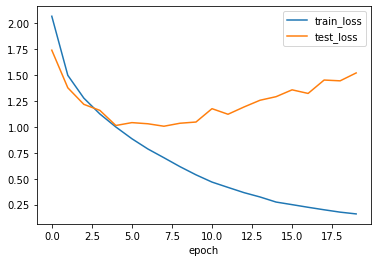

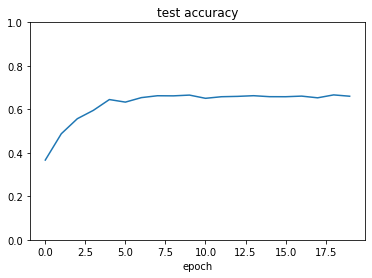

In [95]:
print(num_epochs)
# print(history)
plt.figure()
plt.plot(range(len(train_loss_list)), train_loss_list, label='train_loss')
plt.plot(range(len(val_loss_list)), val_loss_list, label='test_loss')
plt.xlabel('epoch')
plt.legend()
plt.savefig('loss2.png')

plt.figure()
plt.plot(range(len(val_acc_list)), val_acc_list)
plt.ylim(0, 1)
plt.title('test accuracy')
plt.xlabel('epoch')
plt.savefig('test_acc2.png')
print(val_acc_list)
print(train_loss_list)
print(val_loss_list)